# AFP 2023 - Team #13
# Regressions
# Bitcoin (BTC)
# Transformation (regression model): Log-log

### Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

### Data

In [2]:
### Load data

path = 'log-log.csv'

df = pd.read_csv(path)

df.set_index('Date', inplace=True)

df

,log_return,directionality,log_30d_rolling_volatility,log_volume,log_spx,log_nasdaq,log_vix,log_epu,log_gepu,log_nft_attention,...,log_no_of_addresses_over_1k,log_mean_transaction_fee,log_revenue_per_hash_unit,log_mean_hash_rate,log_no_of_blocks,log_inflows,log_outflows,log_no_of_transactions,log_transfers,log_no_of_transfers
Date,,,,,,,,,,,,,,,,,,,,,
2/1/2017,0.018942,1,-0.001347,0.428099,0.000298,0.004950,-0.015126,0.127808,-0.010111,0.000056,...,0.013360,-0.013335,0.005541,0.280762,0.280762,0.182635,0.251875,0.105076,-0.082380,0.203992
2/2/2017,0.022548,1,0.000279,-0.243945,0.000570,-0.001144,0.010110,-0.332298,0.006384,0.000056,...,0.162223,0.247990,0.029235,-0.201250,-0.201250,-0.201993,-0.249571,-0.289494,0.249572,-0.270072
2/3/2017,0.016732,1,-0.066934,0.347318,0.007238,0.005409,-0.083892,0.145265,0.006344,0.000056,...,0.008848,-0.119890,0.018532,-0.052299,-0.052299,0.290288,0.407298,0.224226,0.266609,0.154095
2/4/2017,0.013344,1,-0.137698,-0.193160,-0.000705,-0.000189,0.012081,-0.392185,0.006304,0.000056,...,0.006348,-0.005622,0.005318,-0.030012,-0.034133,-0.422927,-0.256179,-0.125073,-0.341164,-0.168204
2/5/2017,-0.013733,0,-0.142493,-0.157249,-0.000706,-0.000189,0.011937,0.867942,0.006264,0.000056,...,-0.012032,-0.049189,-0.093078,0.166663,0.099091,-0.156907,-0.188164,0.030348,-0.123636,0.016121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6/14/2023,-0.030969,0,0.025905,0.207267,0.000819,0.003909,-0.051257,0.284116,-0.000438,0.000872,...,-0.012465,0.241154,-0.033222,-0.180165,-0.194642,-0.157278,-0.104637,-0.194170,0.035751,-0.123304
6/15/2023,0.018362,1,0.014843,0.274920,0.012105,0.011408,0.043700,-0.730606,-0.000438,0.000871,...,0.008569,-0.175189,0.003644,0.208495,0.201422,0.268960,0.364086,0.232793,-0.067236,0.208265
6/16/2023,0.029164,1,0.024658,-0.158100,-0.003678,-0.006789,-0.068500,-0.227024,-0.000438,0.000870,...,0.013592,-0.074582,0.033162,0.033226,0.033226,0.072168,0.111119,0.213665,-0.200840,0.130253


### Data check

In [4]:
print(df.dtypes)

log_return                       float64
directionality                     int64
log_30d_rolling_volatility       float64
log_volume                       float64
log_spx                          float64
log_nasdaq                       float64
log_vix                          float64
log_epu                          float64
log_gepu                         float64
log_nft_attention                float64
log_cbdc_uncertainty             float64
log_cbdc_attention               float64
log_web                          float64
log_news                         float64
log_augmento                     float64
log_supply_equality_ratio        float64
log_no_of_active_address         float64
log_no_of_addresses_over_10k     float64
log_no_of_addresses_over_100k    float64
log_no_of_addresses_over_1m      float64
log_no_of_addresses_over_1k      float64
log_mean_transaction_fee         float64
log_revenue_per_hash_unit        float64
log_mean_hash_rate               float64
log_no_of_blocks

### Response variables (dependent / LHS)

In [3]:
### BTC close log-change (aka log-return)
log_btc = df.iloc[:, 0]

### BTC 30-day rolling volatility log-change
log_vol = df.iloc[:, 2]

### Explanatory variables (independent / RHS)

In [4]:
### Volume log-change
log_volume = df.iloc[:, 3]

### S&P 500 log-change
log_spx = df.iloc[:, 4]

### NASDAQ log-change
log_nasdaq = df.iloc[:, 5]

### VIX log-change
log_vix = df.iloc[:, 6]

### EPU (US) log-change
log_epu = df.iloc[:, 7]

### GEPU (Global) log-change
log_gepu = df.iloc[:, 8]

### NFT Attention log-change
log_nft_attention = df.iloc[:, 9]

### CBDC Uncertainty log-change
log_cbdc_uncertainty = df.iloc[:, 10]

### CBDC Attention log-change
log_cbdc_attention = df.iloc[:, 11]

### Google Trends Web log-change
log_web = df.iloc[:, 12]

### Google Trends News log-change
log_news = df.iloc[:, 13]

### Augmento Bull & Bear log-change
log_augmento = df.iloc[:, 14]

### Supply-equality ratio log-change
log_ser = df.iloc[:, 15]

### Active addresses count log-change
log_no_of_active_address = df.iloc[:, 16]

### Addresses with balance over 10k log-change
log_address_over10k = df.iloc[:, 17]

### Addresses with balance over 100k log-change
log_address_over100k = df.iloc[:, 18]

### Addresses with balance over 1m log-change
log_address_over1m = df.iloc[:, 19]

### Addresses with balance over 1k log-change
log_address_over1k = df.iloc[:, 20]

### Mean transaction fee log-change
log_mean_transaction_fee_usd = df.iloc[:, 21]

### Hashprice (revenue per hash rate) log-change
log_hashprice_usd = df.iloc[:, 22]

### Mean hash rate log-change
log_mean_hash_rate = df.iloc[:, 23]

### Block count log-change
log_no_of_blocks = df.iloc[:, 24]

### Deposits to exchanges (inflows) log-change
log_inflows_usd = df.iloc[:, 25]

### Withdrawals from exchanges (outflows) log-change
log_outflows_usd = df.iloc[:, 26]

### Transactions count log-change
log_no_of_transactions = df.iloc[:, 27]

### USD value of transfers log-change
log_transfers_usd = df.iloc[:, 28]

### Transfers count log-change
log_no_of_transfers = df.iloc[:, 29]

### Correlation matrix: Detect *multicolinearity*

In [5]:
correlation_matrix = df[['log_volume', 
                        'log_spx', 'log_nasdaq', 'log_vix', 
                        'log_epu', 'log_gepu', 'log_nft_attention', 'log_cbdc_uncertainty', 'log_cbdc_attention', 
                                 'log_web', 'log_news','log_augmento',
                        'log_supply_equality_ratio', 'log_no_of_active_address', 'log_no_of_addresses_over_10k',
                            'log_no_of_addresses_over_100k', 'log_no_of_addresses_over_1m', 'log_no_of_addresses_over_1k',
                            'log_mean_transaction_fee', 'log_revenue_per_hash_unit', 'log_mean_hash_rate', 
                             'log_no_of_blocks', 'log_inflows', 'log_outflows', 'log_no_of_transactions', 
                             'log_transfers', 'log_no_of_transfers']].corr()

styled_matrix = correlation_matrix.style.applymap(lambda x: 'background-color: yellow' if abs(x) > .5 and x != 1 else '')

styled_matrix

,log_volume,log_spx,log_nasdaq,log_vix,log_epu,log_gepu,log_nft_attention,log_cbdc_uncertainty,log_cbdc_attention,log_web,log_news,log_augmento,log_supply_equality_ratio,log_no_of_active_address,log_no_of_addresses_over_10k,log_no_of_addresses_over_100k,log_no_of_addresses_over_1m,log_no_of_addresses_over_1k,log_mean_transaction_fee,log_revenue_per_hash_unit,log_mean_hash_rate,log_no_of_blocks,log_inflows,log_outflows,log_no_of_transactions,log_transfers,log_no_of_transfers
log_volume,1.000000,-0.020701,-0.008877,-0.018191,-0.104976,0.007051,0.001131,0.029656,0.018839,0.019413,0.014815,0.391002,0.079778,0.312534,0.032756,0.003711,0.044852,0.035180,0.339007,0.129785,-0.015202,-0.019356,0.380422,0.362497,0.331777,0.305111,0.354808
log_spx,-0.020701,1.000000,0.949110,-0.708145,0.019470,-0.057279,0.015761,0.006939,0.000445,0.033987,-0.017429,-0.041009,0.017415,0.005434,0.193140,0.126952,0.111702,0.202986,0.036462,0.223200,-0.004081,-0.000152,-0.028139,-0.001070,-0.000623,-0.023657,0.006568
log_nasdaq,-0.008877,0.949110,1.000000,-0.701876,0.026751,-0.050701,0.017717,0.005383,-0.000854,0.028098,-0.019969,-0.034721,0.016853,0.004175,0.199637,0.134064,0.119298,0.209919,0.047630,0.231751,-0.006725,-0.003662,-0.023063,0.005873,-0.000885,-0.019074,0.006350
log_vix,-0.018191,-0.708145,-0.701876,1.000000,-0.020241,0.059001,-0.022875,-0.025683,-0.019156,-0.016145,0.013358,0.041149,-0.031712,0.003974,-0.129123,-0.092267,-0.065735,-0.145424,-0.050532,-0.173484,0.034696,0.035985,0.035297,-0.002360,0.021728,0.039217,0.000495
log_epu,-0.104976,0.019470,0.026751,-0.020241,1.000000,0.002734,-0.011177,0.003605,-0.007701,0.000457,-0.002659,-0.067356,-0.014071,-0.119982,0.012947,0.003282,0.008417,0.011627,-0.079623,-0.017904,0.014704,0.014636,-0.073630,-0.093930,-0.136821,-0.019159,-0.130317
log_gepu,0.007051,-0.057279,-0.050701,0.059001,0.002734,1.000000,0.005337,-0.016167,-0.021653,-0.040729,0.129393,-0.014009,0.009034,-0.001126,0.010611,0.010359,0.006125,0.014154,0.008020,0.026115,0.001008,0.000441,-0.005142,-0.001805,-0.000623,0.002146,-0.002784
log_nft_attention,0.001131,0.015761,0.017717,-0.022875,-0.011177,0.005337,1.000000,0.147615,0.373892,0.025047,0.008459,0.023367,-0.032970,0.010878,0.014977,0.013528,0.000223,0.015221,-0.004534,0.027038,-0.019678,-0.017348,0.032119,0.040963,0.035893,0.020448,0.033513
log_cbdc_uncertainty,0.029656,0.006939,0.005383,-0.025683,0.003605,-0.016167,0.147615,1.000000,0.629397,0.009286,0.013022,0.017927,-0.011558,-0.003383,0.041974,0.024816,0.034261,0.043924,0.022426,0.037648,0.015994,0.008116,0.013352,-0.012193,0.022731,-0.006444,0.020399
log_cbdc_attention,0.018839,0.000445,-0.000854,-0.019156,-0.007701,-0.021653,0.373892,0.629397,1.000000,0.020018,0.017949,0.019801,-0.026309,0.002621,0.030475,0.017517,0.021631,0.031539,0.044438,0.036777,-0.018013,-0.024737,0.019729,0.017653,0.021089,0.008870,0.023415
log_web,0.019413,0.033987,0.028098,-0.016145,0.000457,-0.040729,0.025047,0.009286,0.020018,1.000000,0.373106,0.002060,0.052545,0.003859,0.083620,0.065639,0.059405,0.093923,0.027027,0.094245,0.003702,0.003733,0.004509,-0.000103,-0.003210,0.006170,-0.001344


#
# Outputs
# log_BTC ~ log_all

In [6]:
y = log_btc
x = pd.concat([log_volume, 
               log_spx, log_nasdaq, log_vix, 
               log_epu, log_gepu, log_nft_attention, log_cbdc_uncertainty, log_cbdc_attention, 
                       log_web, log_news, log_augmento,
               log_ser, log_no_of_active_address, log_address_over10k, log_address_over100k, log_address_over1m, 
                       log_address_over1k, log_mean_transaction_fee_usd, log_hashprice_usd, log_mean_hash_rate, 
                       log_no_of_blocks, log_inflows_usd, log_outflows_usd, log_no_of_transactions, log_transfers_usd, 
                       log_no_of_transfers], axis=1)

model = sm.OLS(y, sm.add_constant(x))
out = model.fit()

print(out.summary(), 2*"\n")

                            OLS Regression Results                            
Dep. Variable:             log_return   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     555.2
Date:                Tue, 05 Dec 2023   Prob (F-statistic):               0.00
Time:                        14:00:22   Log-Likelihood:                 6521.4
No. Observations:                2329   AIC:                        -1.299e+04
Df Residuals:                    2301   BIC:                        -1.283e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

### Comments:

**Multicolinearity** is present ($x_{i}$ variables are strongly inter-correlated) <br>
Durbin-Watson: **Autocorrelation** is *NOT* present in the residuals <br>
Jarque-Bera (JB): *Reject* the null hypothesis ($H_{0}$) i.e., residuals *are NOT* **normally distributed**

### Residuals

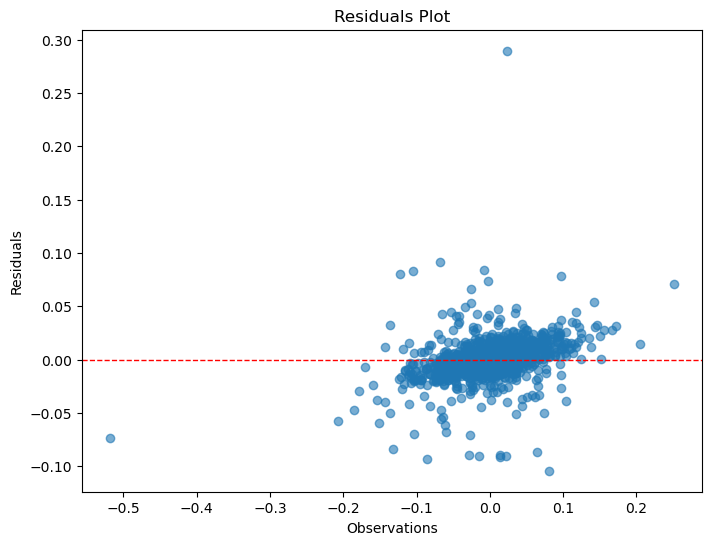

In [9]:
residuals = out.resid
plt.figure(figsize=(8, 6))
plt.scatter(y, residuals, alpha=0.6)
plt.title('Residuals Plot')
plt.xlabel('Observations')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)
plt.show()

### Backward selection

In [8]:
y = log_btc
x = pd.concat([log_nasdaq, 
               log_augmento,
               log_ser, log_no_of_active_address, log_address_over10k, log_address_over100k, log_address_over1m, 
                       log_address_over1k, log_mean_transaction_fee_usd, log_hashprice_usd, log_mean_hash_rate, 
                       log_no_of_blocks, log_transfers_usd, log_no_of_transfers], axis=1)

model = sm.OLS(y, x)
out = model.fit()

print(out.summary(), 2*"\n")

                                 OLS Regression Results                                
Dep. Variable:             log_return   R-squared (uncentered):                   0.866
Model:                            OLS   Adj. R-squared (uncentered):              0.866
Method:                 Least Squares   F-statistic:                              1073.
Date:                Mon, 04 Dec 2023   Prob (F-statistic):                        0.00
Time:                        11:30:20   Log-Likelihood:                          6516.1
No. Observations:                2329   AIC:                                 -1.300e+04
Df Residuals:                    2315   BIC:                                 -1.292e+04
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
                                    coef    std err          t      P>|t|      [0.025      0.975]
----------------------

### Comments:

**Multicolinearity** is still present ($x_{i}$ variables are strongly inter-correlated) <br>
Durbin-Watson: **Autocorrelation** is still present in the residuals <br>
Jarque-Bera (JB): Still *reject* the null hypothesis ($H_{0}$) i.e., residuals *are NOT* **normally distributed**

### Plots

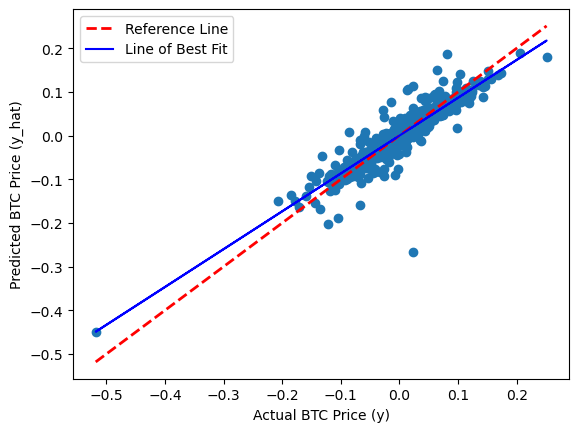

In [26]:
y_hat = out.predict(x)

### Plots
plt.scatter(y, y_hat)
plt.plot([y.min(), y.max()], [y.min(), y.max()], linestyle='--', color='red', label='Reference Line', linewidth=2)
fit_line = np.polyfit(y, y_hat, 1)
fit_line_fn = np.poly1d(fit_line)
plt.plot(y, fit_line_fn(y), color='blue', label='Line of Best Fit')
plt.xlabel('Actual BTC Price (y)')
plt.ylabel('Predicted BTC Price (y_hat)')
plt.legend()
plt.show()

### 
### With lags
### *Lags don't work here...*

# 
# Outputs
# log-change of 30d rolling volatility of BTC ~ log_all

In [32]:
y = log_vol
x = pd.concat([log_volume, 
               log_spx, log_nasdaq, log_vix, 
               log_epu, log_gepu, log_nft_attention, log_cbdc_uncertainty, log_cbdc_attention, 
                       log_web, log_news, log_augmento,
               log_ser, log_no_of_active_address, log_address_over10k, log_address_over100k, log_address_over1m, 
                       log_address_over1k, log_mean_transaction_fee_usd, log_hashprice_usd, log_mean_hash_rate, 
                       log_no_of_blocks, log_inflows_usd, log_outflows_usd, log_no_of_transactions, log_transfers_usd, 
                       log_no_of_transfers], axis=1)

model = sm.OLS(y, sm.add_constant(x))
out = model.fit()

print(out.summary(), 2*"\n")

                                OLS Regression Results                                
Dep. Variable:     log_30d_rolling_volatility   R-squared:                       0.125
Model:                                    OLS   Adj. R-squared:                  0.115
Method:                         Least Squares   F-statistic:                     12.22
Date:                        Mon, 04 Dec 2023   Prob (F-statistic):           7.04e-50
Time:                                03:21:10   Log-Likelihood:                 3011.4
No. Observations:                        2329   AIC:                            -5967.
Df Residuals:                            2301   BIC:                            -5806.
Df Model:                                  27                                         
Covariance Type:                    nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

### Comments:

**Multicolinearity** is present ($x_{i}$ variables are strongly inter-correlated) <br>
Durbin-Watson: **Autocorrelation** is present in the residuals <br>
Jarque-Bera (JB): *Reject* the null hypothesis ($H_{0}$) i.e., residuals *are NOT* normally distributed

### Residuals

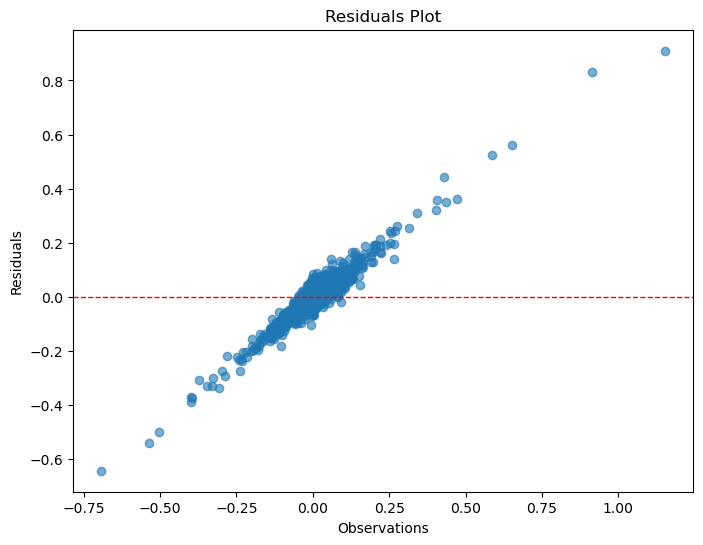

In [33]:
residuals = out.resid
plt.figure(figsize=(8, 6))
plt.scatter(y, residuals, alpha=0.6)
plt.title('Residuals Plot')
plt.xlabel('Observations')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)
plt.show()

### Backward selection

In [62]:
y = log_vol
x = pd.concat([log_volume, 
               log_spx, 
               log_augmento,
               log_no_of_active_address, log_mean_transaction_fee_usd, log_hashprice_usd, log_no_of_blocks], axis=1)

model = sm.OLS(y, x)
out = model.fit()

print(out.summary(), 2*"\n")

                                     OLS Regression Results                                    
Dep. Variable:     log_30d_rolling_volatility   R-squared (uncentered):                   0.117
Model:                                    OLS   Adj. R-squared (uncentered):              0.114
Method:                         Least Squares   F-statistic:                              43.99
Date:                        Mon, 04 Dec 2023   Prob (F-statistic):                    1.08e-58
Time:                                03:30:15   Log-Likelihood:                          3000.3
No. Observations:                        2329   AIC:                                     -5987.
Df Residuals:                            2322   BIC:                                     -5946.
Df Model:                                   7                                                  
Covariance Type:                    nonrobust                                                  
                                coef    

### Comments:

**Multicolinearity** is *NOT* present any longer <br>
Durbin-Watson: **Autocorrelation** is still present in the residuals <br>
Jarque-Bera (JB): Still *reject* the null hypothesis ($H_{0}$) i.e., residuals *are NOT* **normally distributed**

### Plots

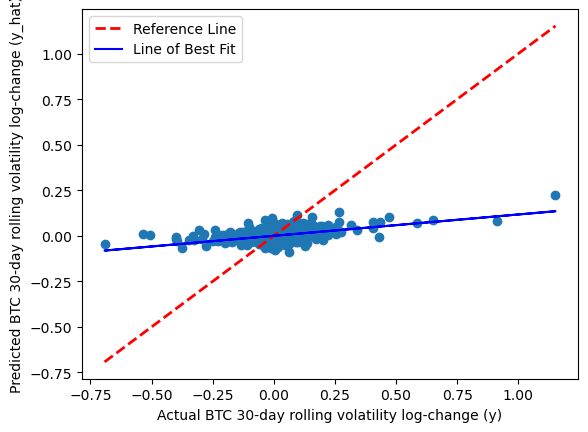

In [63]:
y_hat = out.predict(x)

### Plots
plt.scatter(y, y_hat)
plt.plot([y.min(), y.max()], [y.min(), y.max()], linestyle='--', color='red', label='Reference Line', linewidth=2)
fit_line = np.polyfit(y, y_hat, 1)
fit_line_fn = np.poly1d(fit_line)
plt.plot(y, fit_line_fn(y), color='blue', label='Line of Best Fit')
plt.xlabel('Actual BTC 30-day rolling volatility log-change (y)')
plt.ylabel('Predicted BTC 30-day rolling volatility log-change (y_hat)')
plt.legend()
plt.show()

### 
### With lags
### *Lags don't work here...*

### 
### Save to .xls

In [ ]:
#summary = pd.read_html(out.summary().tables[1].as_html(), header=0, index_col=0)[0]

#summary.to_excel("out.xlsx")